## Noisy communication plot development


Began with the heatmaps of average final polarization over 50 trials, each run to 10k iterations.

In [13]:
import warnings
warnings.simplefilter('ignore')

import h5py
import numpy as np
import os
import pandas as pd

from glob import glob

ne_dir = 'data/noise_experiment_all/'

g = glob(os.path.join(ne_dir, '*'))
print(len(g))
print(g[:4])

726
['data/noise_experiment_all/2add5e30-5361-4239-baf4-0368731d67c4.hdf5', 'data/noise_experiment_all/d15fa32c-2953-432d-9a90-30ce402a26ef.hdf5', 'data/noise_experiment_all/be576f85-1e30-4090-b9de-70f8a4037ea1.hdf5', 'data/noise_experiment_all/ec179c26-fe34-409e-a84f-942a27df49f2.hdf5']


The function `_hdfs_dict` returns a dictionary keyed by the model run parameters.

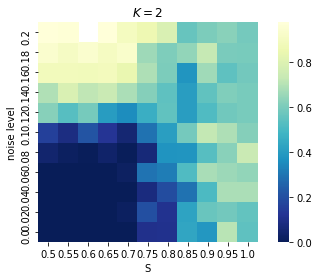

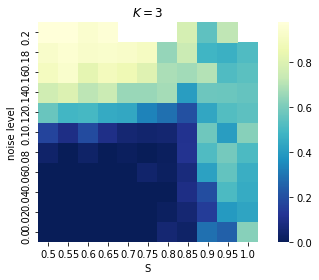

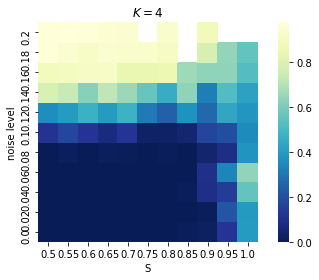

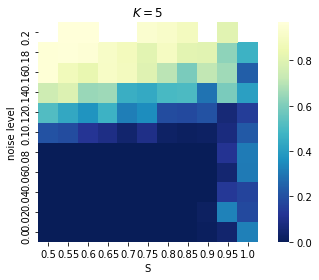

In [18]:
from complexity_analysis import plot_p_v_noise_and_k

plot_p_v_noise_and_k(ne_dir)
# Sync to {save_path}_K={K}.pdf; no need
# to set fig sizes since these are square pdfs.
# plot_p_v_noise_and_k(ne_dir, save_path='test_save_noise_comm')

We will now apply the analyses from the IC plots, which will require some development of new functions to select single `(S, K)` or `(noise_level, K)` pairs whereas before we only needed to specify `K` in order to make plots like the one below. Essentially, we will want to examine the variability in an x-y plot where the x-axis is either the magnitude of initial opinion or the noise level. 

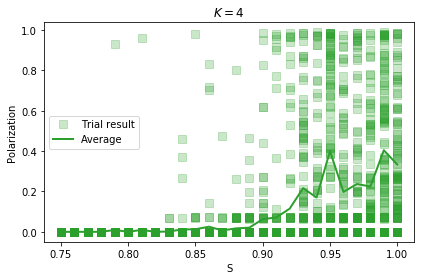

In [19]:
from complexity_analysis import plot_single_S_K
plot_single_S_K('data/ic_k234', 4)

So what we need is something that works like this that would plot the column corresponding to $S=0.5$, for example. 
```python
plot_single_param_spec('data/noise_experiment_all/', 
                       S=0.5)
```
Or this would plot the row corresponding to $\sigma=0.1$
```python

plot_single_param_spec('data/noise_experiment_all/', 
                       noise_level=0.1)
```

I'll demonstrate this first by looking at the $S=0.5$ column of the heatmap built again below for comparison.

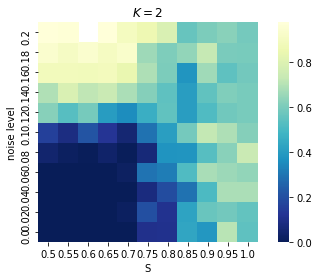

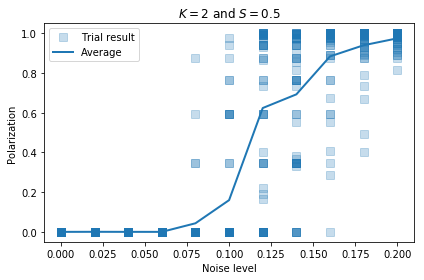

In [30]:
from complexity_analysis import plot_single_noise_param
plot_p_v_noise_and_k(ne_dir, Ks=[2])
plt.figure()
plot_single_noise_param(ne_dir, 2, S=0.5)

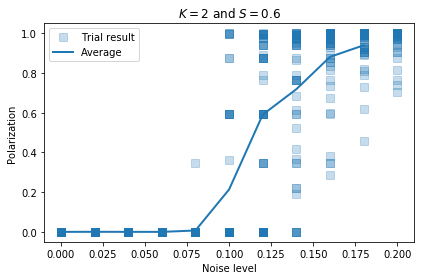

In [31]:
plot_single_noise_param(ne_dir, 2, S=0.6)